In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

# Отбор признаков

In [56]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")
X = df.drop(["target", "index"], axis=1)
y = df[["target"]]

In [57]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [58]:
common_features = [c for c in train_X.columns if c in test_X.columns]
train_X = train_X[common_features]
test_X = test_X[common_features]

## Корреляционный анализ

In [59]:
train_X.columns

Index(['back-suspension', 'battery-capacity', 'charge-time', 'compression',
       'consumption-mixed', 'cylinders-order', 'cylinders-value',
       'engine-feeding', 'engine-start', 'engine-stop', 'engine-type',
       'gear-type', 'luxury', 'max-speed', 'power-electro-kw', 'supply-system',
       'valves', 'valvetrain', 'weight', 'configurations_auto-premiere',
       'configurations_back-wheel-base', 'configurations_front-brake',
       'configurations_safety-rating', 'configurations_seats',
       'configurations_tank-volume', 'supergen_year-stop',
       'models_country-from', 'models_group', 'models_light-and-commercial',
       'models_male'],
      dtype='object')

In [60]:
ordinal = ['back-suspension', 'cylinders-order', 'engine-feeding', 'configurations_seats']
numerical = ['battery-capacity', 'charge-time', 'compression', 'consumption-mixed', 'cylinders-value', 'engine-start', 'engine-stop', 'luxury',
             'max-speed', 'power-electro-kw','valves','weight','configurations_auto-premiere','configurations_back-wheel-base','configurations_tank-volume',
             'supergen_year-stop',]
catigorial = ['engine-type','gear-type', 'supply-system', 'valvetrain', 'configurations_front-brake', 'configurations_safety-rating','models_country-from',
              'models_group', 'models_light-and-commercial','models_male']

In [61]:
train = train_X

In [62]:
# Обучение модели линейной регрессии на полном наборе данных
model = LinearRegression()
model.fit(train_X, train_y)

LinearRegression()

In [63]:
import shap

### Задание

Для сокращенных данных (train_cut_X и test_cut_X) реализовать метод отбора важности признаков по Шепли.

In [64]:
# Создаём SHAP-объяснитель для исходной модели
explainer = shap.Explainer(model, train_X)
shap_values = explainer(test_X)

In [65]:
# Выбираем сокращённый набор данных (например, первые 5 признаков)
train_cut_X = train_X[train_X.columns[:5]]
test_cut_X = test_X[train_X.columns[:5]]

In [66]:
# Обучаем новую модель на сокращённых данных
model_cut = LinearRegression().fit(train_cut_X, train_y)

In [67]:
# Вычисляем SHAP-значения для сокращённого набора
explainer_cut = shap.Explainer(model_cut, train_cut_X)
shap_values_cut = explainer_cut(test_cut_X)

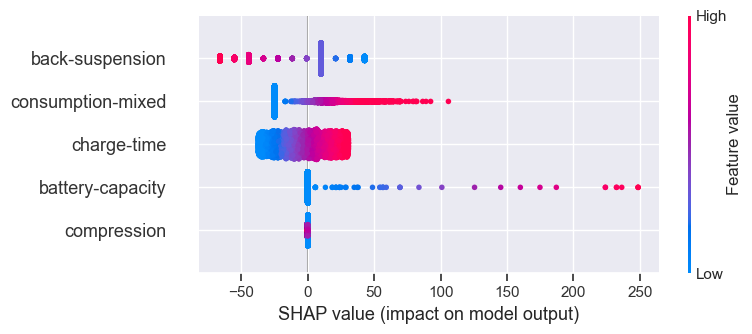

In [68]:
# Построение summary plot для SHAP-значений
shap.summary_plot(shap_values_cut, test_cut_X)

### Задание

Самостоятельно реализовать алгоритм отбора признаков на основе пермутационной важности. Построить гистограмму полученных значений.

In [70]:
# Пермутационная важность
def permutation_importance(model, X_test, y_test, metric=mean_squared_error, n_repeats=10):
    baseline_score = metric(y_test, model.predict(X_test))
    feature_importances = {}

    for col in X_test.columns:
        scores = []
        for _ in range(n_repeats):
            X_test_permuted = X_test.copy()
            X_test_permuted[col] = shuffle(X_test_permuted[col].values)
            permuted_score = metric(y_test, model.predict(X_test_permuted))
            scores.append(permuted_score - baseline_score)

        feature_importances[col] = np.mean(scores)
    
    return feature_importances

In [71]:
# Вычисление важности признаков
feature_importance = permutation_importance(model, test_X, test_y)
feature_importance

{'back-suspension': -0.07314282520092093,
 'battery-capacity': 543.0222264129719,
 'charge-time': 1674.0951387935797,
 'compression': 1160.5699081710754,
 'consumption-mixed': 30.367161122435938,
 'cylinders-order': -11.124843142240206,
 'cylinders-value': 21207.820395725656,
 'engine-feeding': 382.1895535924068,
 'engine-start': 2691.0664958072703,
 'engine-stop': 114.91611814549178,
 'engine-type': 2985.086353782185,
 'gear-type': 1201.635155024333,
 'luxury': 119.13093742310775,
 'max-speed': 846.574769255743,
 'power-electro-kw': 53.18566980288633,
 'supply-system': 4.02099270727449,
 'valves': 166.23750334606848,
 'valvetrain': 15.866867699890644,
 'weight': 873.9864800850439,
 'configurations_auto-premiere': 1730.9437631177861,
 'configurations_back-wheel-base': 700.9627783838474,
 'configurations_front-brake': 177.19890601523767,
 'configurations_safety-rating': 34.21184825030978,
 'configurations_seats': 5546.208750151462,
 'configurations_tank-volume': 5946.139913228743,
 'sup

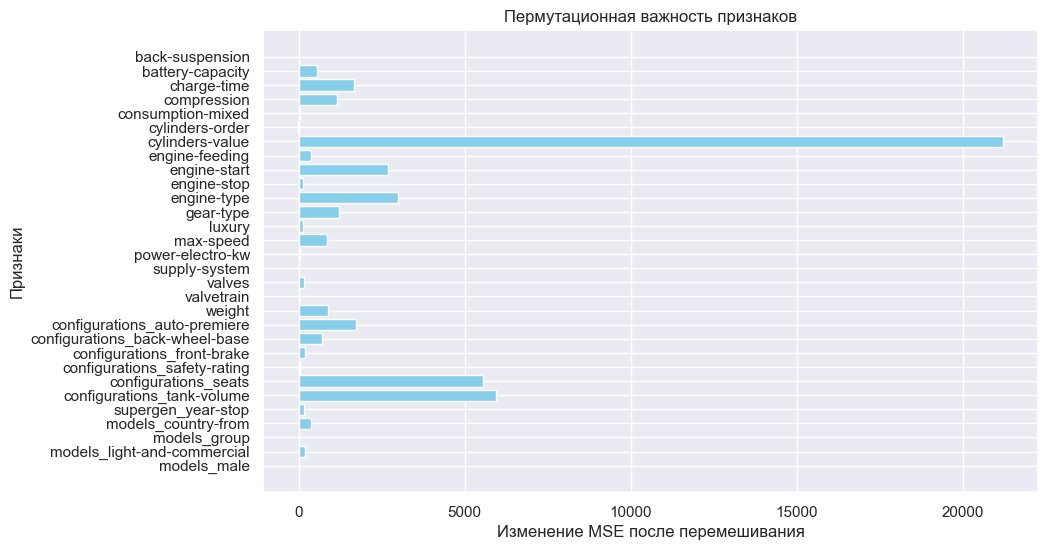

In [72]:
# Визуализация
plt.figure(figsize=(10, 6))
plt.barh(list(feature_importance.keys()), list(feature_importance.values()), color='skyblue')
plt.xlabel("Изменение MSE после перемешивания")
plt.ylabel("Признаки")
plt.title("Пермутационная важность признаков")
plt.gca().invert_yaxis()
plt.show()

1. Какие признаки самые важные?

Пермутационная важность измеряет, насколько ухудшается метрика (MSE), если мы случайно перемешиваем значения данного признака. Чем больше изменение MSE, тем важнее признак.

самые важные признаки:

- cylinders-value → 21394.35 (очень высокий вклад!)
- configurations_tank-volume → 5929.26
- configurations_seats → 5640.56
- engine-start → 2711.97
- engine-type → 2911.75
- charge-time → 1669.23
Эти признаки значительно увеличивают ошибку модели при перемешивании, значит, они действительно важны для предсказаний.

2. Какие признаки маловажны или могут быть удалены?
Признаки с низкой или отрицательной важностью:

- back-suspension → -0.093 (почти ноль, вообще не влияет)
- models_group → 0.33 (близко к нулю, малозначительный)
- models_male → 8.15 (низкий вклад)
- valvetrain → 13.79 (низкий вклад)
- configurations_safety-rating → 34.35 (низкий вклад)

Эти признаки можно попробовать удалить и проверить, улучшится ли модель.